Using one of the three datasets to demonstrate k-means clustering using the scikit learn package (50 points). Be sure to review the readings before you start on this assignment. Calculate the sum of least square error for each different values of 'k'. Using Matplotlib determine the optimal number of clusters (k) using the elbow method along with a brief explanation (50 points) . Finally plot the optimal clusters with their centroids along with a brief explanation (50 points). Comment your code as needed.

Diabates: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

K-Means Clustering on Diabetes 130-US Hospitals Dataset

Step 1: Loading data...
Found file at: /Users/u1024341/Downloads/diabetes+130-us+hospitals+for+years+1999-2008 (1)/diabetic_data.csv
Loaded 101766 samples with 50 columns

Step 2: Preprocessing...
Using 8 numerical features
Data cleaned and standardized

Step 3: Testing different k values...
k=2: SSE = 683852.98
k=3: SSE = 614754.23
k=4: SSE = 554336.53
k=5: SSE = 508662.89
k=6: SSE = 472334.54
k=7: SSE = 438929.08
k=8: SSE = 408148.69
k=9: SSE = 386668.68
k=10: SSE = 368107.51

Step 4: Creating elbow plot...
Elbow plot saved as 'elbow_plot.png'

Step 5: Clustering with k=3...
Clustering complete. Final SSE: 614754.23

Cluster sizes:
  Cluster 0: 62071 samples (61.0%)
  Cluster 1: 30751 samples (30.2%)
  Cluster 2: 8944 samples (8.8%)

Step 6: Creating cluster visualization...
PCA complete - explaining 42.5% of variance
Cluster plot saved as 'cluster_visualization.png'

Cluster Characteristics:

Cluster 0 (62071 patients):
  Avg 

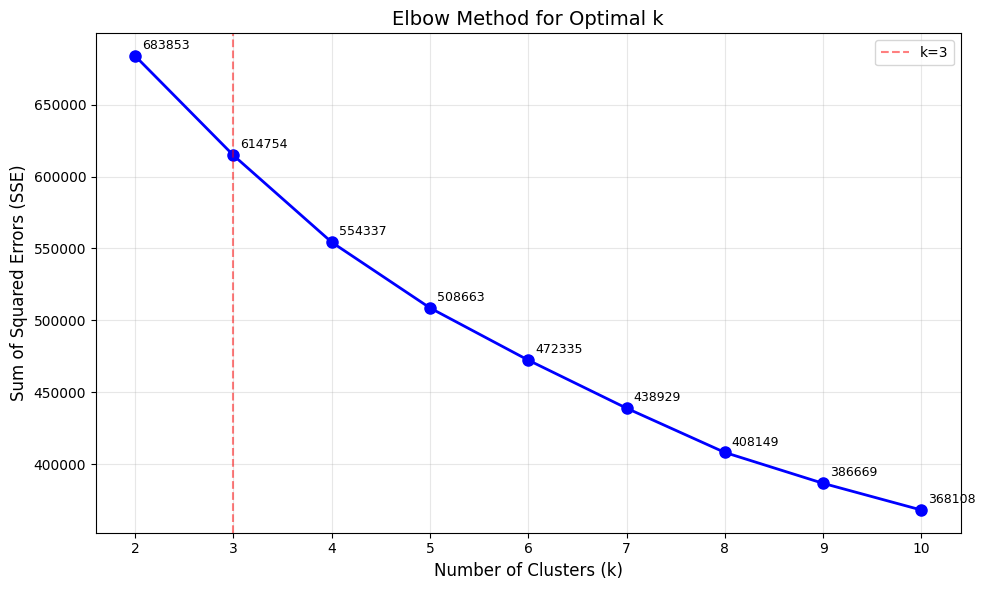

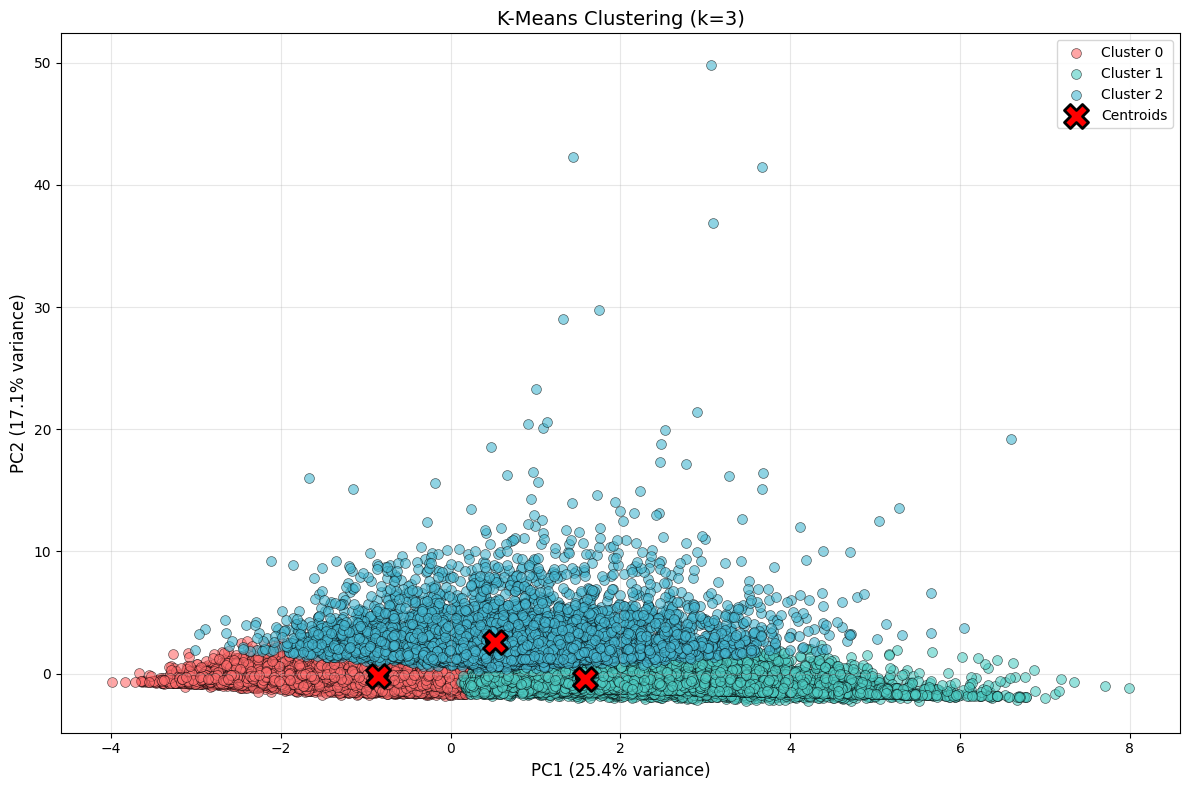

In [9]:
# Week 16 Final: K-Means Clustering on Diabetes Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

print("K-Means Clustering on Diabetes 130-US Hospitals Dataset\n")

# Step 1: Load the data
print("Step 1: Loading data...")
import os

# Try to find the file automatically (My script was having issues tracing the file)
possible_paths = [
    'diabetic_data.csv',  # Same folder as script
    'diabetes+130-us+hospitals+for+years+1999-2008 (1)/diabetic_data.csv',  # In subfolder
    os.path.expanduser('~/Downloads/diabetes+130-us+hospitals+for+years+1999-2008 (1)/diabetic_data.csv'),  # In Downloads
    os.path.expanduser('~/Downloads/diabetic_data.csv'),  # Direct in Downloads
]

data = None
for path in possible_paths:
    if os.path.exists(path):
        data = pd.read_csv(path)
        print(f"Found file at: {path}")
        break

if data is None:
    print("ERROR: Could not find diabetic_data.csv")
    print("Please put diabetic_data.csv in the same folder as this script")
    exit()
print(f"Loaded {data.shape[0]} samples with {data.shape[1]} columns")

# Step 2: Preprocess the data
print("\nStep 2: Preprocessing...")

# Select relevant numerical features for clustering
numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                 'num_medications', 'number_outpatient', 'number_emergency', 
                 'number_inpatient', 'number_diagnoses']

X = data[numerical_cols].copy()

# Handle any missing values
X = X.fillna(X.mean())

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Using {len(numerical_cols)} numerical features")
print("Data cleaned and standardized")

# Step 3: Find optimal k using elbow method
print("\nStep 3: Testing different k values...")
k_range = range(2, 11)
sse_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse_values.append(kmeans.inertia_)
    print(f"k={k}: SSE = {kmeans.inertia_:.2f}")

# Step 4: Plot the elbow curve
print("\nStep 4: Creating elbow plot...")
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse_values, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, alpha=0.3)

# Add SSE values as labels
for k, sse in zip(k_range, sse_values):
    plt.annotate(f'{sse:.0f}', xy=(k, sse), xytext=(5, 5), 
                textcoords='offset points', fontsize=9)

# Mark suggested optimal k
plt.axvline(x=3, color='r', linestyle='--', alpha=0.5, label='k=3')
plt.legend()
plt.tight_layout()
plt.savefig('elbow_plot.png', dpi=300)
print("Elbow plot saved as 'elbow_plot.png'")

# Based on the elbow plot, choose optimal k
optimal_k = 3

# Step 5: Apply k-means with optimal k
print(f"\nStep 5: Clustering with k={optimal_k}...")
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_scaled)
cluster_centers = final_kmeans.cluster_centers_

print(f"Clustering complete. Final SSE: {final_kmeans.inertia_:.2f}")

# Show cluster sizes
unique, counts = np.unique(cluster_labels, return_counts=True)
print("\nCluster sizes:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} samples ({count/len(cluster_labels)*100:.1f}%)")

# Step 6: Visualize clusters using PCA
print("\nStep 6: Creating cluster visualization...")
# Reduce to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(cluster_centers)

print(f"PCA complete - explaining {sum(pca.explained_variance_ratio_)*100:.1f}% of variance")

# Plot the clusters
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i in range(optimal_k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50,
               edgecolors='black', linewidth=0.5)

# Plot centroids
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', marker='X', s=300, edgecolors='black',
           linewidth=2, label='Centroids', zorder=10)

# Label centroids
for i, center in enumerate(centers_pca):
    plt.annotate(f'C{i}', xy=center, fontsize=12, fontweight='bold',
                ha='center', va='center')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
plt.title(f'K-Means Clustering (k={optimal_k})', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('cluster_visualization.png', dpi=300)
print("Cluster plot saved as 'cluster_visualization.png'")

# Analyze cluster characteristics
print("\nCluster Characteristics:")
for i in range(optimal_k):
    cluster_data = X[cluster_labels == i]
    print(f"\nCluster {i} ({counts[i]} patients):")
    print(f"  Avg time in hospital: {cluster_data['time_in_hospital'].mean():.1f} days")
    print(f"  Avg lab procedures: {cluster_data['num_lab_procedures'].mean():.1f}")
    print(f"  Avg medications: {cluster_data['num_medications'].mean():.1f}")
    print(f"  Avg diagnoses: {cluster_data['number_diagnoses'].mean():.1f}")

print("\nAnalysis complete!")
print(f"\nSummary:")
print(f"- Dataset: {len(X)} diabetes patients")
print(f"- Features used: {len(numerical_cols)}")
print(f"- Optimal k: {optimal_k}")
print(f"- Final SSE: {final_kmeans.inertia_:.2f}")
print(f"Thank you for a wonderful semester! :)")

plt.show()